In [128]:
from urllib.request import urlretrieve

In [129]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'
urlretrieve(italy_covid_url,'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1784de08f10>)

In [130]:
import os

In [132]:
import pandas as pd

In [133]:
covid_df = pd.read_csv('./italy-covid-daywise.csv')

In [134]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [135]:
type(covid_df)

pandas.core.frame.DataFrame

In [136]:
type(covid_df.new_cases)

pandas.core.series.Series

In [137]:
type(covid_df['new_cases'])

pandas.core.series.Series

In [138]:
covid_df['new_cases'][245]

996.0

In [139]:
covid_df.at[245, 'new_cases']

996.0

In [140]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [141]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [142]:
cases_df  =covid_df[['date','new_cases']]

In [143]:
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [144]:
covid_df_copy = covid_df.copy()

In [145]:
covid_df_copy

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [146]:
covid_df.loc[245]

date          2020-09-01
new_cases          996.0
new_deaths           6.0
new_tests        54395.0
Name: 245, dtype: object

In [147]:
covid_df.loc[245:246]

,date,new_cases,new_deaths,new_tests
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [148]:
covid_df.loc[109:112]

,date,new_cases,new_deaths,new_tests
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0


In [149]:
covid_df.new_tests.first_valid_index()

111

In [150]:
covid_df.sample(5)

,date,new_cases,new_deaths,new_tests
102,2020-04-11,3951.0,570.0,NaN
168,2020-06-16,301.0,26.0,27762.0
229,2020-08-16,629.0,158.0,22470.0
28,2020-01-28,0.0,0.0,NaN
49,2020-02-18,0.0,0.0,NaN


In [151]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

        


In [152]:
print('total cases is {} and total deaths {}'.format(int(total_cases),int(total_deaths)))

total cases is 271515 and total deaths 35497


In [153]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()
death_rate

0.13073679170579894

In [154]:
print('death rate is {:.2f} %'.format(death_rate*100))

death rate is 13.07 %


In [155]:
initial_tests = 935310
tota_tests  = initial_tests + covid_df.new_tests.sum()
tota_tests

5214766.0

In [156]:
positive_rate  = total_cases/tota_tests

In [157]:
positive_rate

0.05206657403227681

In [158]:
print('positive rate is {:.3f} %'.format(positive_rate*100))

positive rate is 5.207 %


In [159]:
high_new_cases = covid_df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [160]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [161]:
high_cases_df = covid_df[covid_df['new_cases'] > 1000]
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [162]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [163]:
high_ratio_df.shape

(12, 4)

In [164]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

In [165]:
covid_df['postive_rate'] = covid_df.new_cases/ covid_df.new_tests

In [166]:
covid_df

,date,new_cases,new_deaths,new_tests,postive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [167]:
covid_df.drop(columns=['postive_rate'],inplace=True)

In [168]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [169]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [170]:
covid_df.sort_values('new_deaths',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [171]:
covid_df.sort_values('new_cases',ascending=True).head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [172]:
covid_df.loc[168:174]
            

,date,new_cases,new_deaths,new_tests
168,2020-06-16,301.0,26.0,27762.0
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0


In [173]:
covid_df.at[172,'new_cases'] = (covid_df.at[171,'new_cases']+covid_df.at[173,'new_cases'])/2

In [174]:
covid_df.loc[168:174]

,date,new_cases,new_deaths,new_tests
168,2020-06-16,301.0,26.0,27762.0
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0


In [175]:
covid_df.date


0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [177]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [178]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [179]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year

In [180]:
covid_df

,date,new_cases,new_deaths,new_tests,year
0,2019-12-31,0.0,0.0,NaN,2019
1,2020-01-01,0.0,0.0,NaN,2020
2,2020-01-02,0.0,0.0,NaN,2020
3,2020-01-03,0.0,0.0,NaN,2020
4,2020-01-04,0.0,0.0,NaN,2020
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020
244,2020-08-31,1365.0,4.0,42583.0,2020
245,2020-09-01,996.0,6.0,54395.0,2020
246,2020-09-02,975.0,8.0,NaN,2020


In [181]:
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month

In [182]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month
0,2019-12-31,0.0,0.0,NaN,2019,12
1,2020-01-01,0.0,0.0,NaN,2020,1
2,2020-01-02,0.0,0.0,NaN,2020,1
3,2020-01-03,0.0,0.0,NaN,2020,1
4,2020-01-04,0.0,0.0,NaN,2020,1
...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8
244,2020-08-31,1365.0,4.0,42583.0,2020,8
245,2020-09-01,996.0,6.0,54395.0,2020,9
246,2020-09-02,975.0,8.0,NaN,2020,9


In [183]:
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day

In [184]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day
0,2019-12-31,0.0,0.0,NaN,2019,12,31
1,2020-01-01,0.0,0.0,NaN,2020,1,1
2,2020-01-02,0.0,0.0,NaN,2020,1,2
3,2020-01-03,0.0,0.0,NaN,2020,1,3
4,2020-01-04,0.0,0.0,NaN,2020,1,4
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31
245,2020-09-01,996.0,6.0,54395.0,2020,9,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2


In [185]:
covid_df['weekday']  = pd.DatetimeIndex(covid_df.date).weekday

In [186]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [187]:
covid_df_may = covid_df[covid_df.month == 5]

In [188]:
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [190]:
covid_df_may_metrics = covid_df_may[['new_cases','new_deaths','new_tests']]

In [191]:
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [192]:
covid_df_may_total = covid_df_may_metrics.sum()

In [193]:
covid_df_may_total

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [197]:
type(covid_df_may_total)

pandas.core.series.Series

In [198]:
covid_df[covid_df.month == 5][['new_cases','new_deaths','new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [199]:
covid_df.new_cases.mean()

1096.6149193548388

In [201]:
covid_df.new_cases[covid_df.weekday == 6].mean()

1247.2571428571428

In [203]:
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

In [214]:
covid_df_month = covid_df.groupby('month')[['new_cases','new_tests','new_deaths']].sum()
covid_df_month

,new_cases,new_tests,new_deaths
month,,,
1,3.0,0.0,0.0
2,885.0,0.0,21.0
3,100851.0,0.0,11570.0
4,101852.0,419591.0,16091.0
5,29073.0,1078720.0,5658.0
6,8217.5,830354.0,1404.0
7,6722.0,797692.0,388.0
8,21060.0,1098704.0,345.0
9,3297.0,54395.0,20.0


In [215]:
covid_df_mean_month = covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].mean()

In [216]:
covid_df_mean_month

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [217]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [218]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5


In [219]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [220]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0


In [221]:
covid_df['total_tests'] = covid_df.new_tests.cumsum()
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


In [222]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x1784e2f5430>)

In [223]:
location_df = pd.read_csv('./locations.csv')

In [224]:
location_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [225]:
location_df[location_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [226]:
covid_df['location']  =  'Italy'

In [227]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


In [228]:
merged_df = covid_df.merge(location_df,on='location')

In [229]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [230]:
merged_df['total_ceses_per_million'] = merged_df.total_cases* 1e6 /merged_df.population

In [231]:
merged_df


,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_ceses_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695


In [232]:
merged_df['total_deaths_per_million'] = merged_df.total_deaths*1e6/merged_df.population
merged_df['total_tests_per_million'] = merged_df.total_tests*1e6/merged_df.population

In [233]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_ceses_per_million,total_deaths_per_million,total_tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,69879.809125
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,70779.467667
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


In [234]:
results_df = merged_df[['date','new_cases','total_cases','new_tests','total_tests','new_deaths','total_deaths',
                       'total_deaths_per_million',
                       'total_tests_per_million',
                       'total_ceses_per_million']]

In [235]:
results_df

,date,new_cases,total_cases,new_tests,total_tests,new_deaths,total_deaths,total_deaths_per_million,total_tests_per_million,total_ceses_per_million
0,2019-12-31,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,NaN,0.000000
1,2020-01-01,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,NaN,0.000000
2,2020-01-02,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,NaN,0.000000
3,2020-01-03,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,NaN,0.000000
4,2020-01-04,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,53541.0,4182478.0,1.0,35473.0,586.700753,69175.513516,4420.946386
244,2020-08-31,1365.0,268663.5,42583.0,4225061.0,4.0,35477.0,586.766910,69879.809125,4443.522614
245,2020-09-01,996.0,269659.5,54395.0,4279456.0,6.0,35483.0,586.866146,70779.467667,4459.995818
246,2020-09-02,975.0,270634.5,NaN,NaN,8.0,35491.0,586.998461,NaN,4476.121695


In [238]:
results_df.to_csv('result1.csv')

<AxesSubplot:>

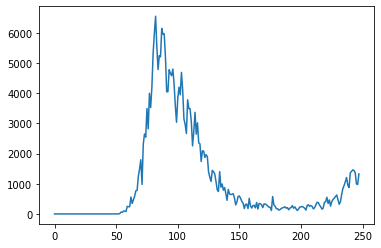

In [239]:
results_df.new_cases.plot()

In [240]:
results_df.set_index('date',inplace=True)

In [241]:
results_df

,new_cases,total_cases,new_tests,total_tests,new_deaths,total_deaths,total_deaths_per_million,total_tests_per_million,total_ceses_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,NaN,0.000000
2020-01-01,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,NaN,0.000000
2020-01-02,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,NaN,0.000000
2020-01-03,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,NaN,0.000000
2020-01-04,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,53541.0,4182478.0,1.0,35473.0,586.700753,69175.513516,4420.946386
2020-08-31,1365.0,268663.5,42583.0,4225061.0,4.0,35477.0,586.766910,69879.809125,4443.522614
2020-09-01,996.0,269659.5,54395.0,4279456.0,6.0,35483.0,586.866146,70779.467667,4459.995818


<AxesSubplot:xlabel='date'>

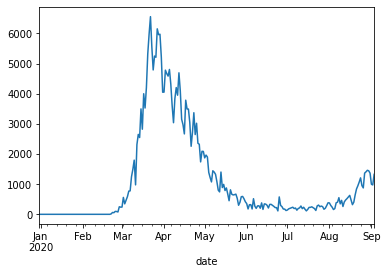

In [242]:
results_df.new_cases.plot()

In [244]:
results_df.loc['2020-09-02']

new_cases                      975.000000
total_cases                 270634.500000
new_tests                             NaN
total_tests                           NaN
new_deaths                       8.000000
total_deaths                 35491.000000
total_deaths_per_million       586.998461
total_tests_per_million               NaN
total_ceses_per_million       4476.121695
Name: 2020-09-02 00:00:00, dtype: float64

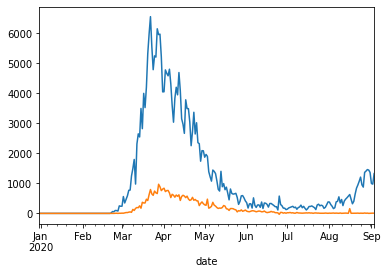

In [245]:
results_df.new_cases.plot()
results_df.new_deaths.plot();

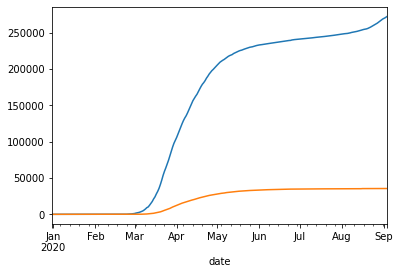

In [246]:
results_df.total_cases.plot()
results_df.total_deaths.plot();

In [247]:
death_rate = results_df.total_deaths/results_df.total_cases

<AxesSubplot:title={'center':'Death Rate'}, xlabel='date'>

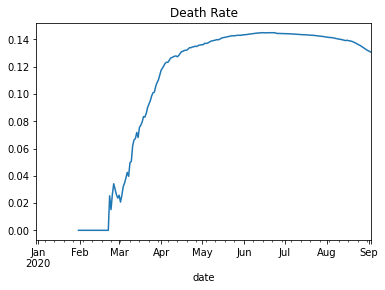

In [248]:
death_rate.plot(title="Death Rate")

In [252]:
positive_rate = results_df.total_cases/results_df.total_tests


<AxesSubplot:title={'center':'po_rate'}, xlabel='date'>

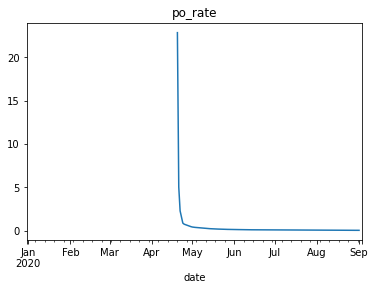

In [253]:
positive_rate.plot(title='po_rate')

<AxesSubplot:xlabel='month'>

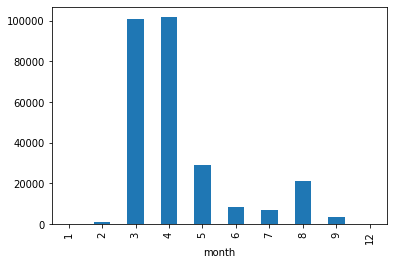

In [254]:
covid_df_month.new_cases.plot(kind='bar')

<AxesSubplot:xlabel='month'>

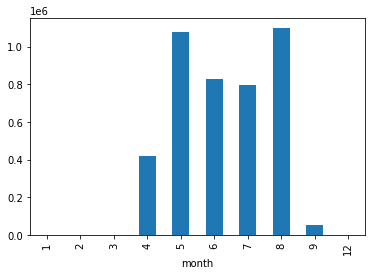

In [255]:
covid_df_month.new_tests.plot(kind='bar')